# Classification algorithms
1. k-Nearest Neighbors (k-NN)
2. Naive Bayes classifier (NB)

#  Load iris dataset

In [1]:
# 칼럼명을 지정하여 데이터 불러오기
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

#### iris는 붓꽃의 종류에 따른 꽃잎크기, 길이 등을 기록한 데이터입니다.

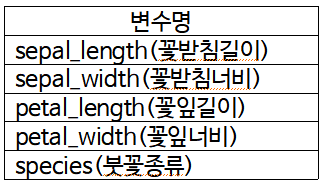

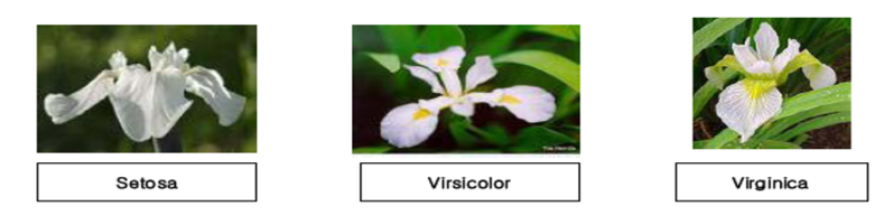

In [2]:
#데이터 앞 5개 항 확인
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#데이터의 크기
iris.shape

(150, 5)

C:\Users\qkrdb\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\qkrdb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


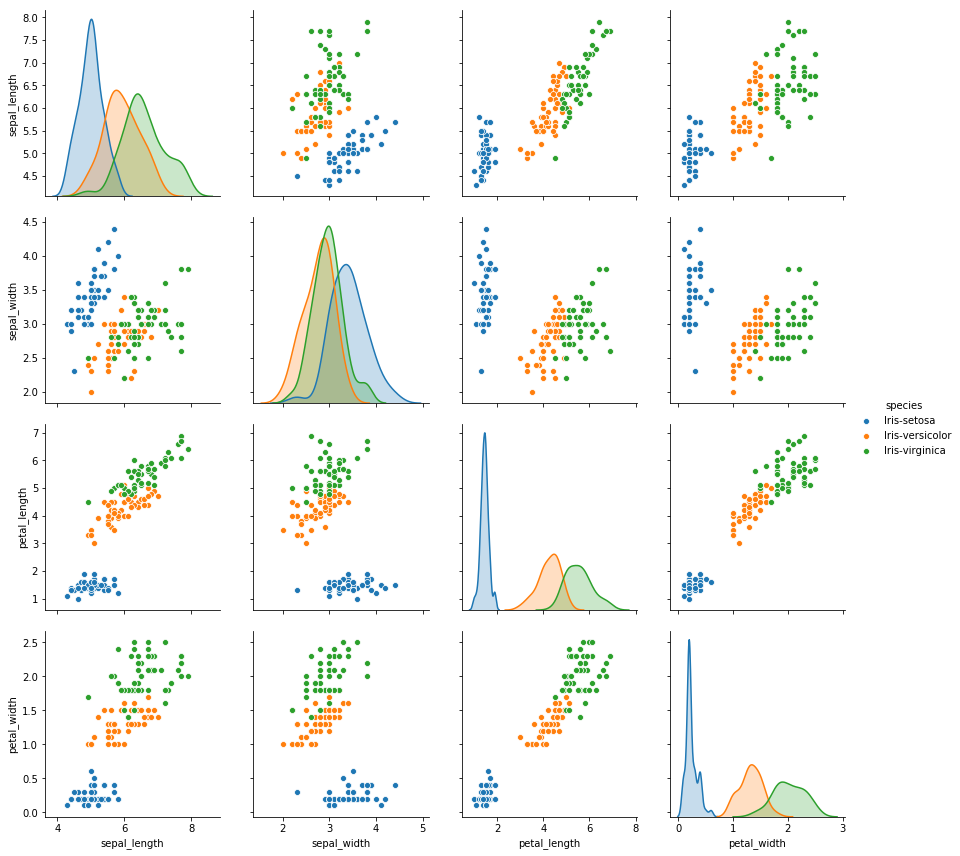

In [4]:
#산점도 행렬 그리기
%matplotlib inline
import seaborn as sns
#'species' 종(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
sns.pairplot(iris, hue="species", size = 3) #hue: 데이터 클래스 

#### X와 Y로 데이터 나누기

In [5]:
# 열 삭제
X = iris.drop('species', axis = 1)
print(type(X))
print(X.shape)
X.head(5)

<class 'pandas.core.frame.DataFrame'>
(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = iris.species
print(type(y))
print(y.shape)
y.head(5)

<class 'pandas.core.series.Series'>
(150,)


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
# train set, test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123)

# 1. k-nearest neighbors 

In [8]:
# KNN 분류 모델을 위한 라이브러리 선언
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors가 k임! 
# k의 값을 1로 선언
knn = KNeighborsClassifier(n_neighbors=1) 
# weight:'uniform'-단순개수 , 'distance'-거리 가중치 
# metric='minkowski' {|x2-x1|^p+|y2-y1|^p}^1/p 만약 p=2면 유클리디언 거리랑 같음 
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [9]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [10]:
# 위에서 선언한 KNN모델에 각 train set을 피팅
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
# test set을 이용해 예측
y_pred = knn.predict(X_test)

In [12]:
# 정확도를 계산하여 모델의 성능을 평가
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
# 실제 예측된 값과 실제 값 비교
cm = metrics.confusion_matrix(y_test, y_pred)

In [13]:
print(accuracy)
print(cm)

0.8947368421052632
[[16  0  0]
 [ 0  7  1]
 [ 0  3 11]]


#### Confusion Matrix(혼동행렬)

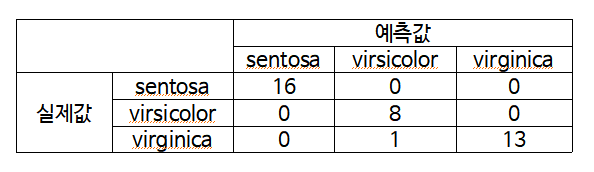

In [14]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.70      0.88      0.78         8
 Iris-virginica       0.92      0.79      0.85        14

      micro avg       0.89      0.89      0.89        38
      macro avg       0.87      0.89      0.87        38
   weighted avg       0.91      0.89      0.90        38



In [15]:
# k 대체 값 테스트
accuracy_set = []
cm_set = []
k_set = [1,3,5,7,9,11] #그냥 오류를 막기위해 홀수를 쓰던 습관 

# for k in range(1,10):
for k in k_set:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) #정확도 뽑기
    cm = metrics.confusion_matrix(y_test, y_pred) #컴퓨전 메트릭스 뽑기 
    accuracy_set.append(accuracy)
    cm_set.append(cm)

In [16]:
from pprint import pprint
pprint(accuracy_set) 
#pprint: pretty print의 약자 조금 더 깔끔하게 나옴
#이를 통해 k=5가 적절함을 알 수 가 있음!

[0.8947368421052632,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]


In [17]:
print(cm_set[2]) #딱 하나의 오류가 있고 나머지는 잘 분류 했다. 

[[16  0  0]
 [ 0  7  1]
 [ 0  0 14]]


## Excercising - vote.csv

##### predict vote(vote=1 참여 o, vote=0 참여 x)
#### 특성값은 성별, 출생지역, 학력, 소득, 연령, 정부지지도, 진보성향, 정치관심도

In [18]:
# vote.csv 불러오기
import pandas as pd
vote=pd.read_csv('vote.csv', encoding='utf-8')
vote.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [19]:
vote.shape

(211, 10)

In [20]:
# 특성(X)과 레이블(y) 나누기

# 방법1: 특성이름으로 불러오기
X=vote[['gender', 'region', 'edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']]

# 방법2: 특성 위치값으로 불러오기
X=vote[vote.columns[0:8]]

# 방법3: loc 함수로 불러오기 (단, 불러올 특성이 연달아 있어야 함.)
X=vote.loc[:, 'gender':'score_intention']

X.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention
0,1,4,3,3,3,2,2,4.0
1,1,5,2,3,3,2,4,3.0
2,1,3,1,2,4,1,3,2.8
3,2,1,2,1,3,5,4,2.6
4,1,1,1,2,4,4,3,2.4


In [21]:
y=vote[["vote"]]

y.head()

,vote
0,1
1,0
2,1
3,1
4,1


In [ ]:
# 1. train set, test set 나누기

In [ ]:
# 2. knn 모델 구축하기(k=3)

In [ ]:
# 3. 모델 평가: test set을 이용하여 정확도, Confusion Matrix 생성하기

In [ ]:
# 4.  Classification report 생성하기

In [22]:
# 내리면 답 있어요.





























# 1. train set, test set 나누기
from sklearn.model_selection import train_test_split
X_trainv, X_testv, y_trainv, y_testv=train_test_split(X, y, stratify=y, random_state=123)

# 2. knn 모델 구축하기(k=3)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainv, y_trainv)

# 3. 모델 평가: test set을 이용하여 정확도, Confusion Matrix 생성하기
from sklearn import metrics
y_predv = knn.predict(X_testv)
accuracyv = metrics.accuracy_score(y_testv, y_predv)
cmv = metrics.confusion_matrix(y_testv, y_predv)
print(accuracyv)
print(cmv)

# 4.  Classification report 생성하기
print(metrics.classification_report(y_testv, y_predv))

0.6981132075471698
[[ 5 10]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.45      0.33      0.38        15
           1       0.76      0.84      0.80        38

   micro avg       0.70      0.70      0.70        53
   macro avg       0.61      0.59      0.59        53
weighted avg       0.67      0.70      0.68        53



C:\Users\qkrdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [23]:
# 특정한 점과 다른 점과의 거리 측정
import numpy as np

def distance(p1, p2):
    return np.sqrt(np.sum(np.power((p2-p1),2)))

p1 = np.array([1,3])    
p2 = np.array([2,6])

print(distance(p1, p2))# (1,3) 과 (2,6) 간의 거리 계산

3.1622776601683795


# 2. Naive Bayes classifier

In [24]:
# Because all variables in iris dataset are numerical, we use Gaussian naive Bayes.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_2 = gnb.predict(X_test)
# GaussianNB(priors=None, var_smoothing=1e-09) 너무 단순. 요소를 다양하게 조정 불가 
# 그외 모델들 
# naive_bayes.BernoulliNB, naive_bayes.MultinomialNB, naive_bayes.ComplementNB

In [25]:
# 정확도를 계산하여 모델의 성능을 평가
accuracy = metrics.accuracy_score(y_test, y_pred_2)
# 실제 예측된 값과 실제 값 비교
cm = metrics.confusion_matrix(y_test, y_pred_2)

In [26]:
print(accuracy)
print(cm)

0.9473684210526315
[[16  0  0]
 [ 0  8  0]
 [ 0  2 12]]


In [27]:
# Classification report
print(metrics.classification_report(y_test, y_pred_2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.86      0.92        14

      micro avg       0.95      0.95      0.95        38
      macro avg       0.93      0.95      0.94        38
   weighted avg       0.96      0.95      0.95        38



## Excercising - Wine Quality Data set

##### predict quality

In [28]:
import pandas as pd
import numpy as np
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                        delimiter=';',dtype=float)
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [29]:
x_data = wine_data.iloc[:,0:-1]
y_data = wine_data.iloc[:,-1]
# quality 값이 7보다 작으면 0,  7보다 크거나 같으면 1로 값 변경.
y_data = np.array([1 if i>=7 else 0 for i in y_data])
x_data.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
# 1. train set, test set 나누기

In [ ]:
# 2. NB 모델 구축하기

In [ ]:
# 3. test set을 이용하여 정확도, Confusion Matrix 생성하기

In [ ]:
# 4.  Classification report 생성하기

In [31]:
# 내리면 답 있어요.




















# 1. train set, test set 나누기
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, random_state=123)

# 2. NB 모델 구축하기
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

# 3. test set을 이용하여 정확도, Confusion Matrix 생성하기
y_pred_wine = gnb.predict(test_x)
accuracy_wine = metrics.accuracy_score(test_y, y_pred_wine)
cm_wine = metrics.confusion_matrix(test_y, y_pred_wine)
print(accuracy_wine)
print(cm_wine)

# 4.  Classification report 생성하기
print(metrics.classification_report(test_y, y_pred_wine))

0.7159183673469388
[[695 283]
 [ 65 182]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       978
           1       0.39      0.74      0.51       247

   micro avg       0.72      0.72      0.72      1225
   macro avg       0.65      0.72      0.66      1225
weighted avg       0.81      0.72      0.74      1225

